In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LinReg:

    def __init__(self, learningRate=0.001, iters=100, verbose=True):
        self.lr = learningRate
        self.iters = iters
        self.weights = None
        self.bias = None
        self.verbose = verbose
        self.lin = np.round(np.linspace(0,self.iters-1,10),0)

    def rss(self, yTrue, yPred):
        return np.sum((yTrue-yPred)**2)        

    def fit(self, X, y):
        nSamples, nFeatures = X.shape

        #initalize parameters
        self.bias = 0
        self.weights = np.zeros(nFeatures)

        #gradient descent
        for iter in range(self.iters):
            yPred = self.bias + np.dot(X, self.weights)

            #take the partial derivatives of the cost function respect to the bias and weights
            dBias = np.sum(yPred - y)
            dWeights = np.dot(X.T, (yPred - y))

            #update the parameters
            self.bias = self.bias - self.lr * dBias 
            self.weights = self.weights - self.lr * dWeights

            #print out information about parameter updates
            if self.verbose and iter in self.lin:
                err = self.rss(y,yPred)
                print("Iteration:", iter+1, "Bias:", self.bias, "Weights:", self.weights, "Cost:", err)
                if nFeatures == 1:
                    if iter == 0:
                        plt.plot(X,y,'o')
                    plt.plot(X,self.weights*X+self.bias)

    def predict(self, X):
        yPred = self.bias + np.dot(X, self.weights)
        return yPred

Iteration: 1 Bias: 0.0094 Weights: [0.1801] Cost: 34.54
Iteration: 2 Bias: 0.009946899999999998 Weights: [0.1888245] Cost: 0.4392066899999998
Iteration: 3 Bias: 0.010064658799999997 Weights: [0.18924265] Cost: 0.35907812596298017
Iteration: 4 Bias: 0.010161574904999998 Weights: [0.18925821] Cost: 0.35887149093954246
Iteration: 5 Bias: 0.010257438040215198 Weights: [0.18925425] Cost: 0.3588526270824445
Iteration: 6 Bias: 0.010353207408297897 Weights: [0.18924935] Cost: 0.3588342215650625
Iteration: 7 Bias: 0.01044892952059993 Weights: [0.18924441] Cost: 0.3588158343328445
Iteration: 8 Bias: 0.010544606651486328 Weights: [0.18923947] Cost: 0.3587974643358779
Iteration: 9 Bias: 0.010640238931202688 Weights: [0.18923453] Cost: 0.35877911155558395
Iteration: 10 Bias: 0.01073582638606251 Weights: [0.18922959] Cost: 0.35876077597582096


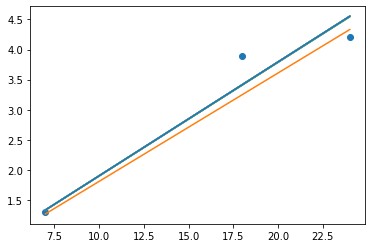

In [2]:
regressor = LinReg(learningRate=0.001, iters=10)

X = np.array([7,18,24]).reshape((-1,1))
y = np.array([1.3,3.9,4.2])

regressor.fit(X,y)

# Train the model

Iteration: 1 Bias: 0.10196963962032402 Weights: [6.11208961] Cost: 467220.7678605428
Iteration: 12 Bias: 0.4684081332717606 Weights: [48.08212023] Cost: 77778.28982144236
Iteration: 23 Bias: 0.3303693558135355 Weights: [64.66517902] Cost: 16989.821886276703
Iteration: 34 Bias: 0.1627857102369108 Weights: [71.21933919] Cost: 7490.154212091484
Iteration: 45 Bias: 0.05137577398763861 Weights: [73.81052103] Cost: 6003.822912169495
Iteration: 56 Bias: -0.010718407134658735 Weights: [74.83524874] Cost: 5770.9856717290095
Iteration: 67 Bias: -0.04248311263020247 Weights: [75.2406173] Cost: 5734.465959211636
Iteration: 78 Bias: -0.057927004164038606 Weights: [75.4010245] Cost: 5728.730771926763
Iteration: 89 Bias: -0.0651871193180326 Weights: [75.46451823] Cost: 5727.828953343848
Iteration: 100 Bias: -0.0685193173580879 Weights: [75.48965864] Cost: 5727.68696695841


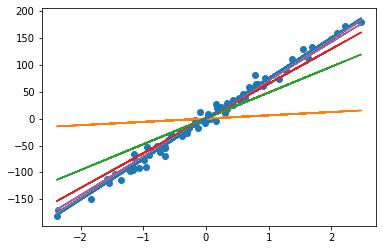

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

skModel = LinearRegression()
ourModel = LinReg()
skModel.fit(X_train,y_train)
ourModel.fit(X_train,y_train)

# Test sklearn vs. our model

In [4]:
def rss(yTrue,yPred):
        return np.sum((yTrue-yPred)**2)
    
skPred = skModel.predict(X_test)
ourPred = ourModel.predict(X_test)

In [5]:
skError = rss(y_test, skPred)
ourError = rss(y_test, ourPred)

In [6]:
print("sklearn error: ",skError)
print("our model error: ", ourError)

sklearn error:  1528.8706581143213
our model error:  1528.7398971932196


In [7]:
print("sklearn intercept:", skModel.intercept_)
print("our model intercept:",ourModel.bias)
print("sklearn coeffs:",skModel.coef_)
print("our model coeffs:",ourModel.weights)

sklearn intercept: -0.07120804279413018
our model intercept: -0.0685193173580879
sklearn coeffs: [75.50615219]
our model coeffs: [75.48965864]
